Importing Libraries

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import single, fcluster, dendrogram, complete
from scipy.spatial.distance import pdist

Generating 30 points for each Gaussian distribution

In [ ]:
mean = (0,0)
cov = [[1,0],[0,1]]
x = pd.DataFrame(np.random.multivariate_normal(mean, cov, 30))
x

,0,1
0,-1.917326,-0.511485
1,-0.457526,-0.831952
2,-1.037807,0.241089
3,0.656753,0.238245
4,1.674734,-0.265331
5,0.297368,-1.501035
6,-0.369335,1.019992
7,-0.863271,-0.872361
8,-0.354511,-0.752024
9,0.323321,-0.407240


In [ ]:
mean2 = (5,0)
cov2 = [[1,0],[0,1]]
x2 = pd.DataFrame(np.random.multivariate_normal(mean2, cov2, 30))
x2

,0,1
0,4.691779,-0.545253
1,5.179041,-0.396123
2,5.705371,0.297860
3,3.280041,0.577716
4,4.386698,1.066553
5,4.821439,-0.571520
6,4.972676,0.560010
7,4.875049,1.240004
8,5.307968,0.260000
9,6.231332,-0.254525


In [ ]:
mean3 = (10,5)
cov3 = [[1,0],[0,1]]
x3 = pd.DataFrame(np.random.multivariate_normal(mean3, cov3, 30))
x3

,0,1
0,10.794601,4.992641
1,10.518876,4.434828
2,11.212108,4.268543
3,9.021092,5.732193
4,9.127325,4.223641
5,9.971061,5.562756
6,9.065717,5.112216
7,11.542854,6.071190
8,10.086738,5.196083
9,10.199083,5.233557


Combining all the points into dataframe X

In [ ]:
df = [x,x2,x3]
X = pd.concat(df)
X


,0,1
0,-1.917326,-0.511485
1,-0.457526,-0.831952
2,-1.037807,0.241089
3,0.656753,0.238245
4,1.674734,-0.265331
...,...,...
25,10.448676,6.210887
26,10.422973,6.939889
27,11.969021,6.388785
28,9.536446,4.918556


In [ ]:
X.to_csv('Multivariate Gaussian.csv', index = False)

Using K-means algorithm to cluster the data, with K ranging from 2 to 10

In [ ]:
inertia = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


Making a distance matrix of dataframe X

In [ ]:
y = pdist(X)

Single linkage

In [ ]:
single_linkage = single(y)
single_linkage.size

356

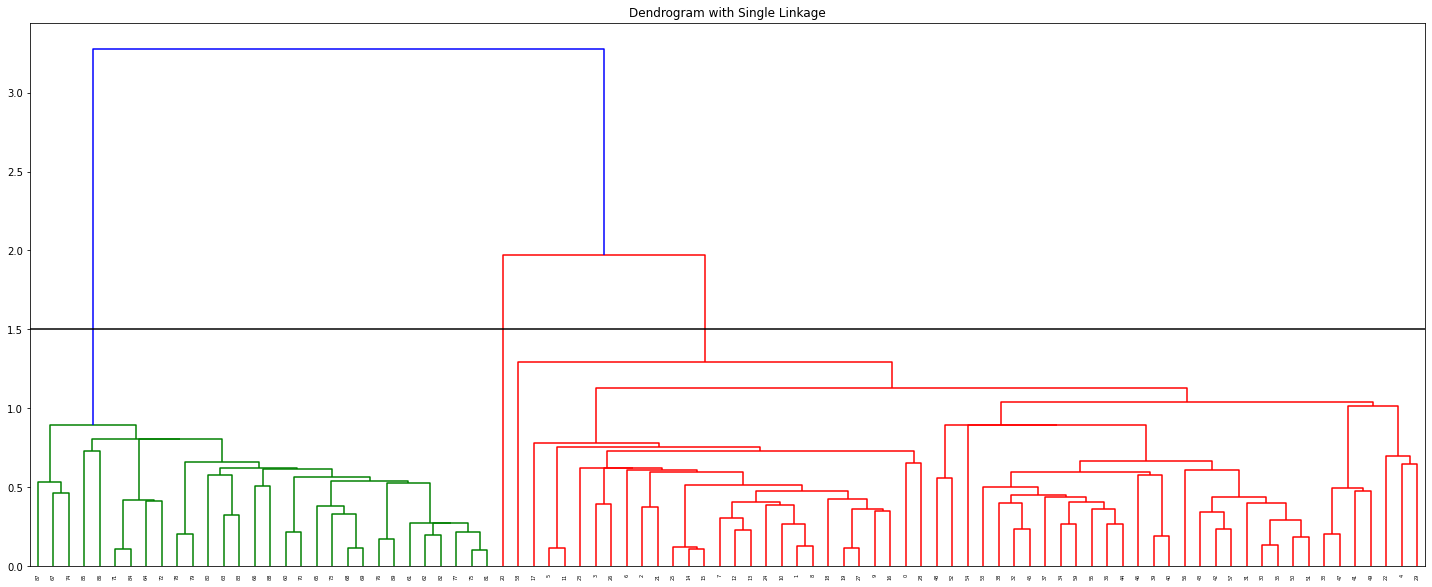

In [ ]:
max_dist = 1.5
fig = plt.figure(figsize=(25, 10))
single_dn = dendrogram(single_linkage)
plt.title('Dendrogram with Single Linkage')
plt.axhline(y = max_dist, c = "k")
plt.show()

Complete Linkage

In [ ]:
complete_linkage = complete(y)
complete_linkage.size

356

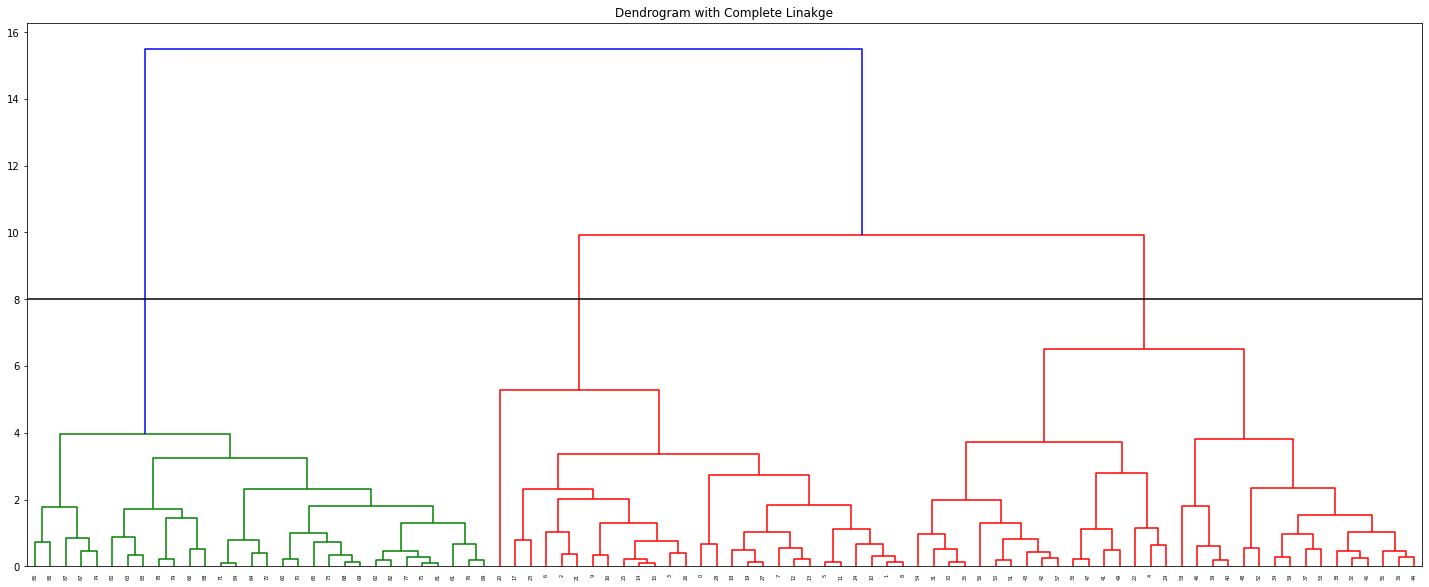

In [ ]:
max_d = 8
fig = plt.figure(figsize=(25, 10))
complete_dn = dendrogram(complete_linkage)
plt.title('Dendrogram with Complete Linakge')
plt.axhline(y = max_d, c = "k")
plt.show()

Another way of estimating the correct number of clusters

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


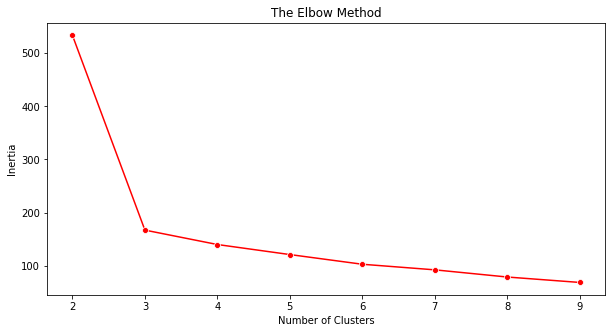

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(2, 10), inertia ,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()